# Results Comparison

**Motivation:** I started observing discrepancies in the output plots from Michalis' old saved data and the results of running my new versions of the scripts, even though the physics code has been left unchanged. My hypothesis is that the differences are due to changes in the `xsuite` ecosystem in the meantime. To confirm, I have:
- Plotted the old data from Michalis: old script, old xsuite (first figure)
- Plotted fresh results from Michalis' _unchanged_ old script: old script, new xsuite (second figure)
- Plotted results from my new version of the script: new script, new xsuite (third figure)

Results tbd below.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotters import PARAMS, plot_emittances_and_momentum_spread_evolution

plt.rcParams.update(PARAMS)
%config InlineBackend.figure_format = "retina"

### Plotting Old Michalis Data - Old Script, Old Xsuite

In [2]:
old_michalis_kinetic = pd.read_parquet("../outputs/xsuite_kinetic.parquet")
old_michalis_simple = pd.read_parquet("../outputs/xsuite_simple.parquet")
old_michalis_analytical = pd.read_parquet("../outputs/xsuite_analytical.parquet")

/var/folders/qh/_90_vgwx2v9020gsml9y554r0000gn/T/ipykernel_97423/938260998.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


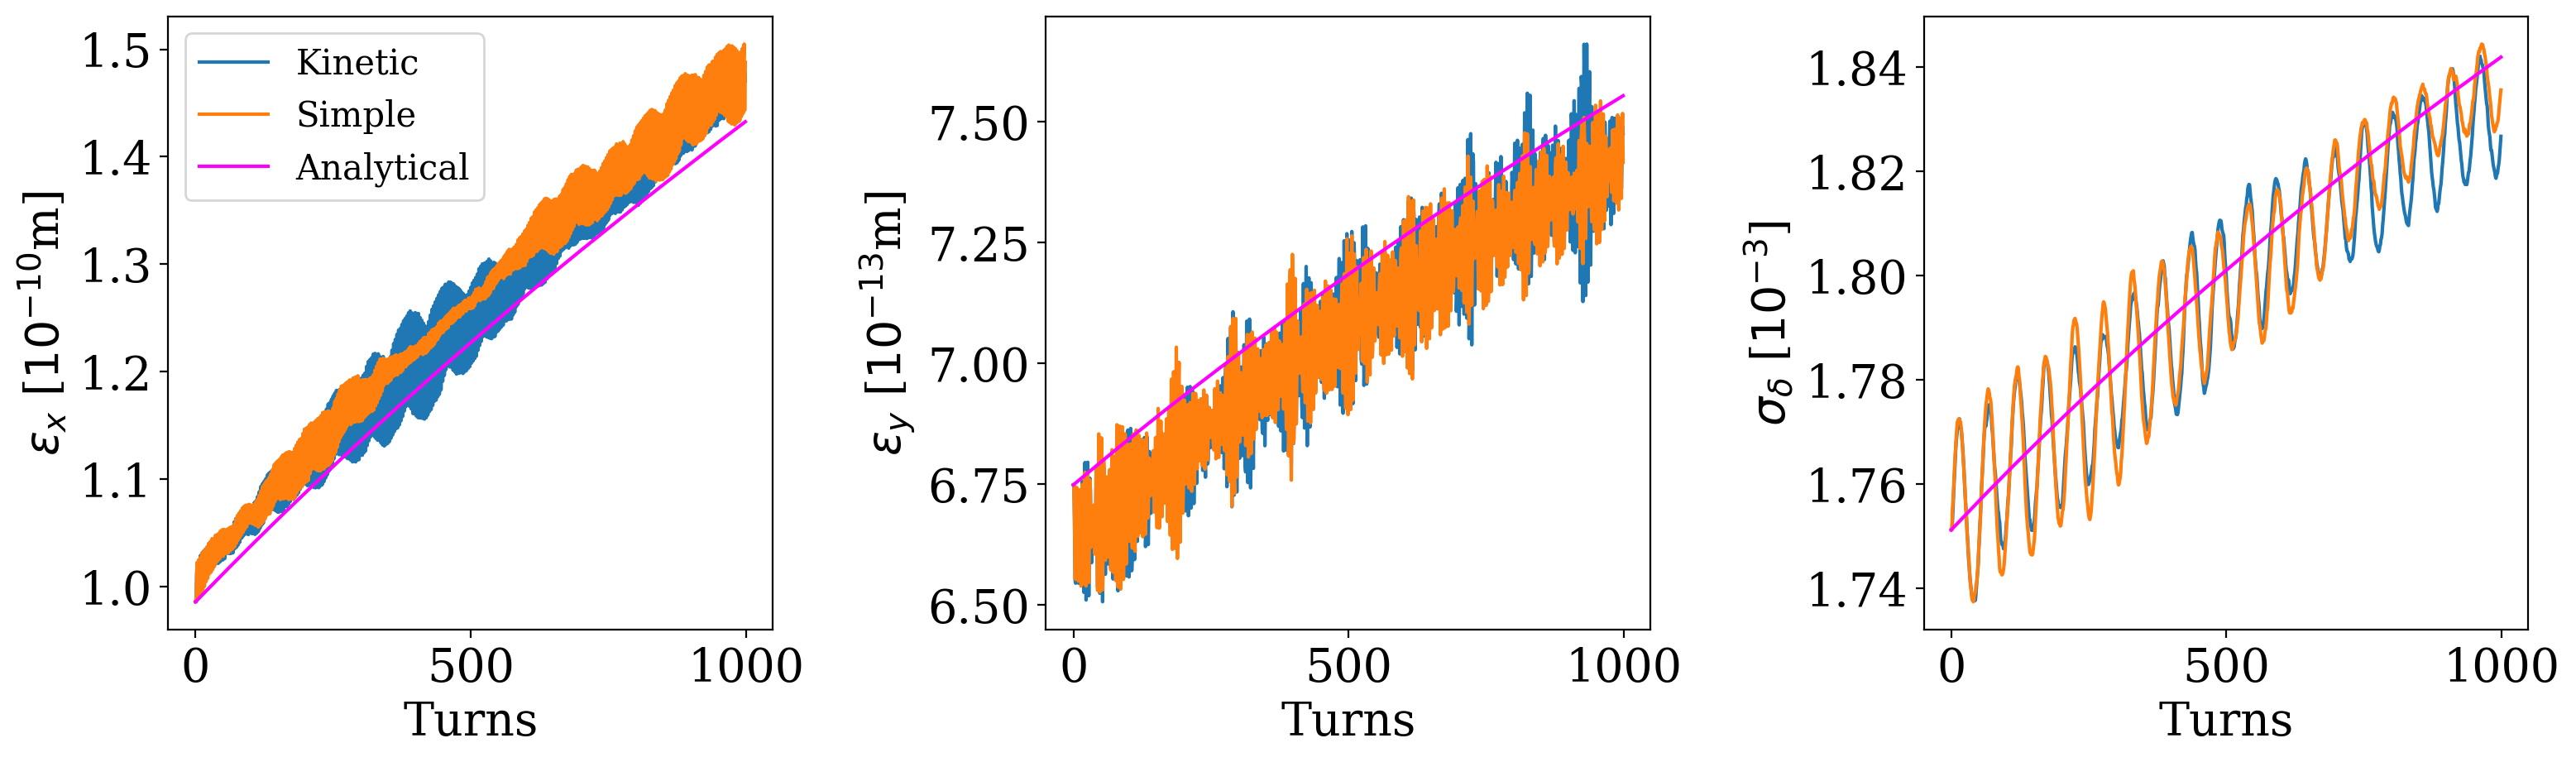

In [3]:
# This is saved data by Michalis, from simulations ran with old Xsuite
figure = plot_emittances_and_momentum_spread_evolution(
    old_michalis_kinetic.eps_x.to_numpy(),
    old_michalis_kinetic.eps_y.to_numpy(),
    old_michalis_kinetic.sig_delta.to_numpy(),
    old_michalis_simple.eps_x.to_numpy(),
    old_michalis_simple.eps_y.to_numpy(),
    old_michalis_simple.sig_delta.to_numpy(),
    old_michalis_analytical.eps_x.to_numpy(),
    old_michalis_analytical.eps_y.to_numpy(),
    old_michalis_analytical.sig_delta.to_numpy(),
)
# figure.suptitle("Plotting Old Data from Michalis")
plt.tight_layout()
plt.show()

### Plotting New Michalis Data - Old Script, New Xsuite

In [4]:
new_michalis_kinetic = pd.read_parquet("../outputs/untouched_xsuite_kinetic.parquet")
new_michalis_simple = pd.read_parquet("../outputs/untouched_xsuite_simple.parquet")
new_michalis_analytical = pd.read_parquet("../outputs/untouched_xsuite_analytical.parquet")

/var/folders/qh/_90_vgwx2v9020gsml9y554r0000gn/T/ipykernel_97423/1135147209.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


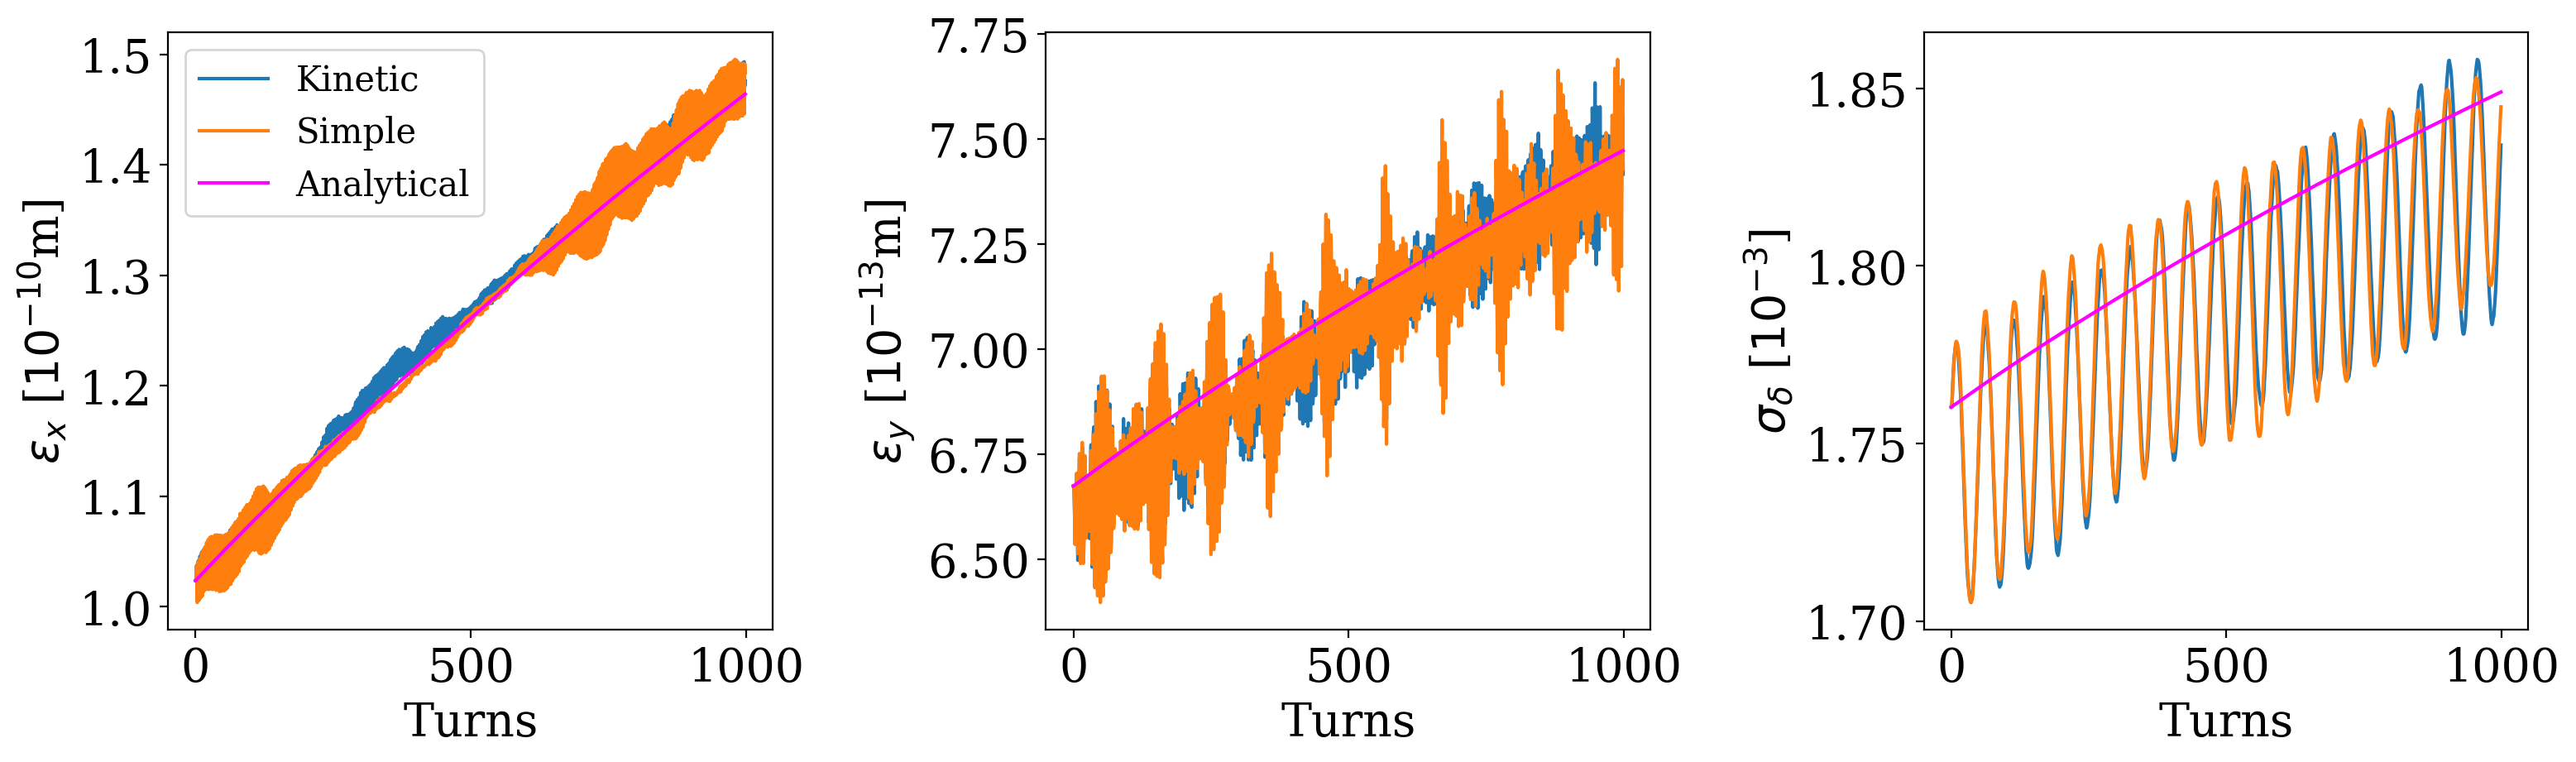

In [5]:
# This is saved data by Michalis, from simulations ran with old Xsuite
figure = plot_emittances_and_momentum_spread_evolution(
    new_michalis_kinetic.eps_x.to_numpy(),
    new_michalis_kinetic.eps_y.to_numpy(),
    new_michalis_kinetic.sig_delta.to_numpy(),
    new_michalis_simple.eps_x.to_numpy(),
    new_michalis_simple.eps_y.to_numpy(),
    new_michalis_simple.sig_delta.to_numpy(),
    new_michalis_analytical.eps_x.to_numpy(),
    new_michalis_analytical.eps_y.to_numpy(),
    new_michalis_analytical.sig_delta.to_numpy(),
)
# figure.suptitle("Plotting Old Data from Michalis")
plt.tight_layout()
plt.show()

### Plotting New Scripts Data - New Script, New Xsuite

In [8]:
with np.load("../outputs/xsuite_kinetic.npz") as data:
    new_kinetic_epsx = data["epsilon_x"]
    new_kinetic_epsy = data["epsilon_y"]
    new_kinetic_sig_delta = data["sig_delta"]

with np.load("../outputs/xsuite_simple.npz") as data:
    new_simple_epsx = data["epsilon_x"]
    new_simple_epsy = data["epsilon_y"]
    new_simple_sig_delta = data["sig_delta"]

with np.load("../outputs/xsuite_analytical.npz") as data:
    new_analytical_epsx = data["epsilon_x"]
    new_analytical_epsy = data["epsilon_y"]
    new_analytical_sig_delta = data["sig_delta"]

/var/folders/qh/_90_vgwx2v9020gsml9y554r0000gn/T/ipykernel_97423/1416857999.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


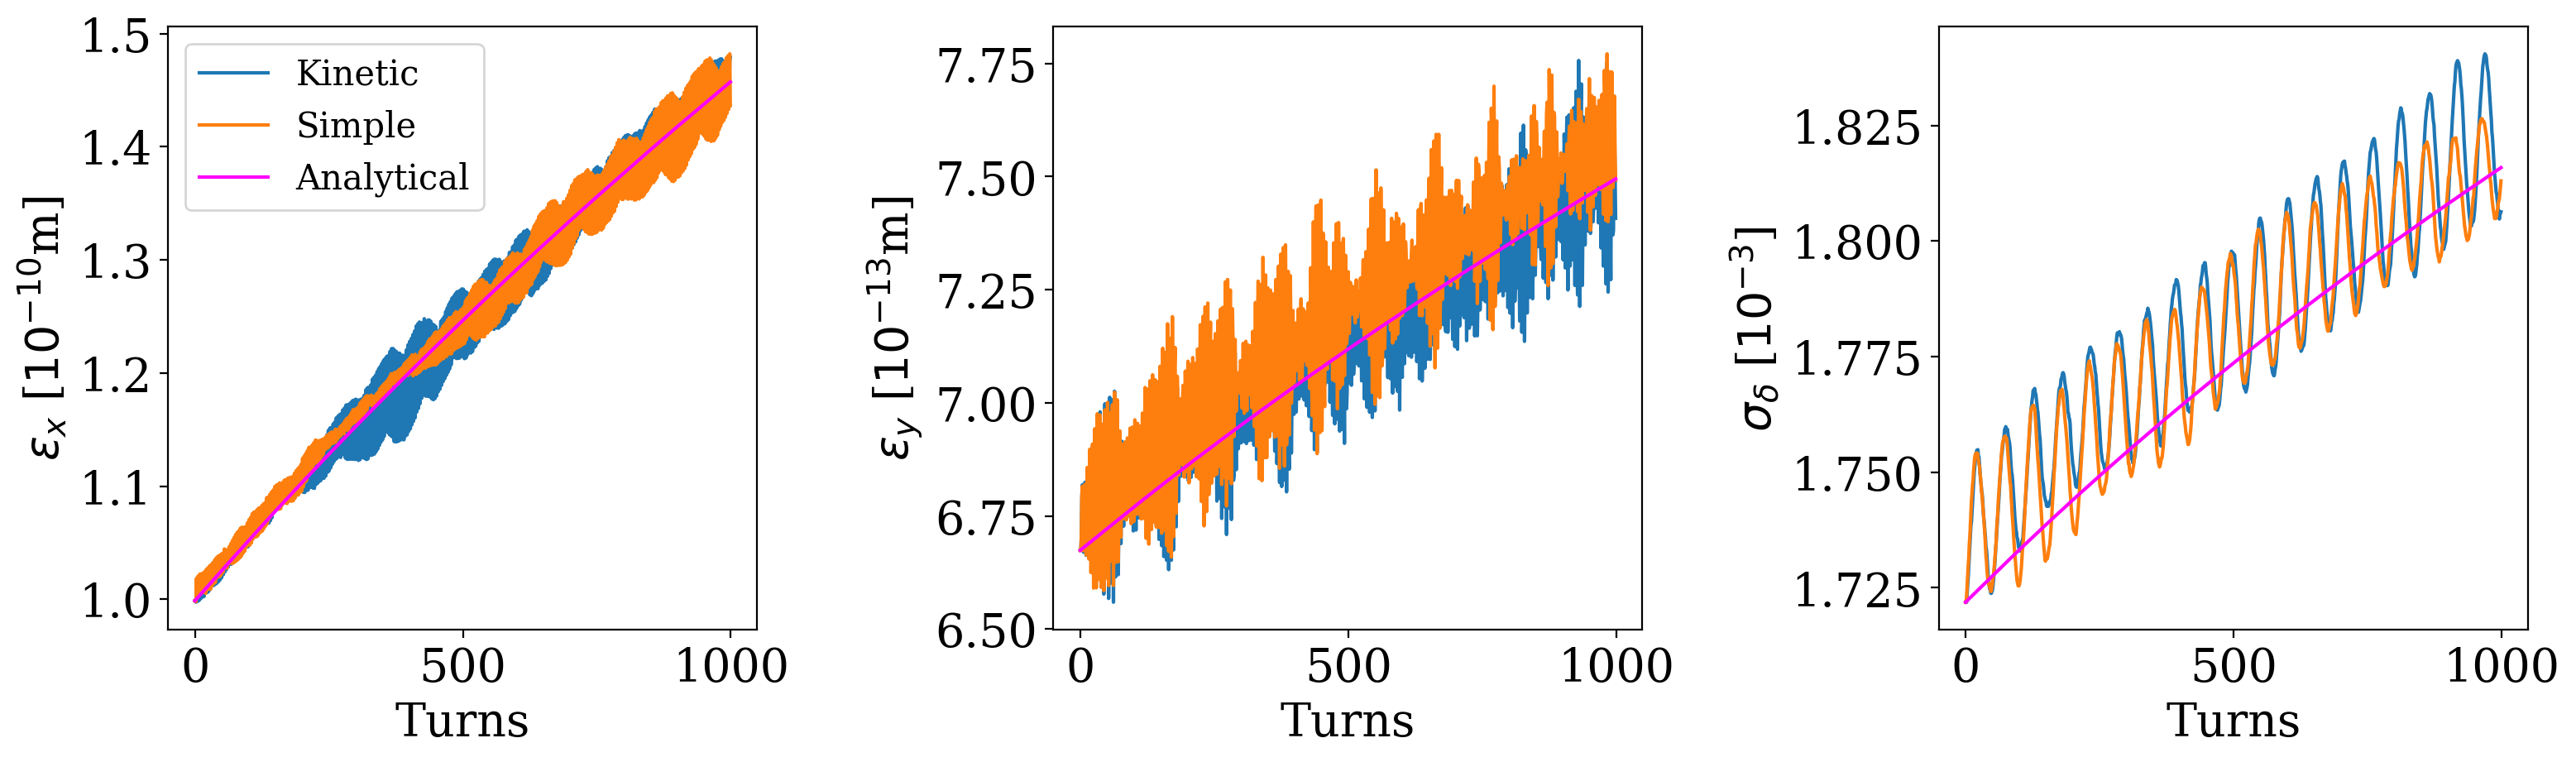

In [9]:
figure = plot_emittances_and_momentum_spread_evolution(
    new_kinetic_epsx,
    new_kinetic_epsy,
    new_kinetic_sig_delta,
    new_simple_epsx,
    new_simple_epsy,
    new_simple_sig_delta,
    new_analytical_epsx,
    new_analytical_epsy,
    new_analytical_sig_delta,
)
# figure.suptitle("Plotting Result Data from New Code")
plt.tight_layout()
plt.show()

**Conclusion:** The new and old script give the same result when using the latest `xsuite`. The difference in data is then explained by the changes in `xsuite`, as thought initially. We good, we can keep going.

---